### Visual intuition for the other definition of variance


I always think of the [variance](https://en.wikipedia.org/wiki/Variance) of some random variable $X$ as $X$'s expected deviation from its mean, $\mu$. That is, I think of the variance as: $Var(X) =\mathbb{E}[(X - \mu)^2]$. Because $\mu$ is the expected value or average of $X$ you can also express the variance as:

$$Var(X)= \mathbb{E}[(X - \mathbb{E}[X])^2]$$

where $\mu = \mathbb{E}[X]$. 

On Wikipedia and in textbooks the variance is also sometimes defined as:

$$Var(X) =\mathbb{E}[X^2] - \mathbb{E}[X]^2$$

which is expected value of $X$ squared, minus the expected square of $X$. I never find this other definition intuitive. This is a visual demonstration of the second definition of variance. (If you are curious about the algebra, I also plow through the derivation at the end of the post).


### Get some data

Let's start by drawing some data from a 1 dimensional normal with some mean and some standard deviation. We'll make a histogram to visualize the data, plotted along with the actual data shown as blue dots along the x axis.

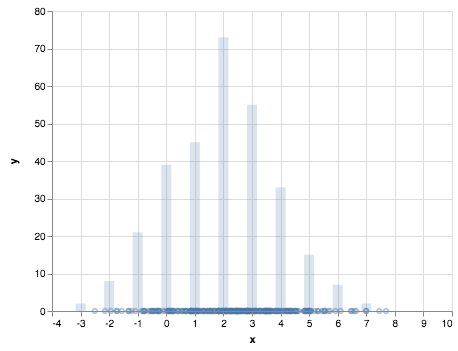

In [198]:
mu, sigma = 2.5, 2 # mean and standard deviation
N = 300
nbins = 10
s = [o for o in np.random.normal(mu, sigma, size=N)]

values, bins = np.histogram(s, bins=np.arange(-3, nbins + 1))

dt = make_altair_object(bins, values)

c1 = make_bar_chart(size=10, opacity=.2, data=dt)

dt = make_altair_object(s, np.zeros(len(s)))

c2 = alt.Chart(dt).mark_point(size=20, opacity=.4).encode(
        x='x:Q',  # specify ordinal data
        y='y:Q',  # specify quantitative data
    )

c1 + c2

If we remove the bars and plot $x_i^2$ for each datapoint $x_i$ as black dots, we have a line of black dots along the curve of $X^2$.

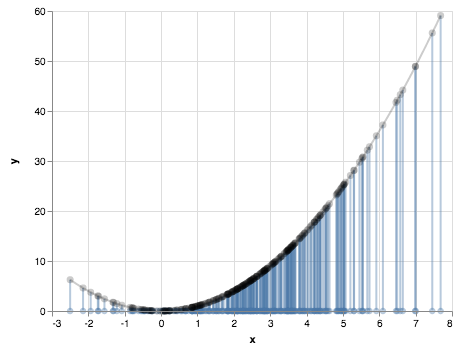

In [203]:
x = np.linspace(min(s), max(s), 1000)
y = [f(i) for i in x]
dt = make_altair_object(x, y)


x2 = alt.Chart(dt).mark_line(opacity=line_opacity, color="black").encode(
    x='x:Q',  # specify ordinal data
    y='y:Q',  # specify quantitative data
)

dt = make_altair_object(X=s, Y=[i ** 2 for i in s])

c4 = alt.Chart(dt).mark_point(opacity=point_opacity, size=point_size, color="black", filled=True).encode(
    x='x:Q',  # specify ordinal data
    y='y:Q',  # specify quantitative data
)

x2 + c2  + c4

ou = []

for x, x_2 in zip(s, [i ** 2 for i in s]):
    Xs = [x, x]
    Ys = [0, x_2]
    dt = make_altair_object(X=Xs, Y=Ys)
    ou.append(alt.Chart(dt).mark_line(opacity=.4).encode(
        x='x:Q',  # specify ordinal data
        y='y:Q',  # specify quantitative data
    ))

import functools

functools.reduce(lambda a,b : a+b,ou + [x2,c2,c4])

The blue points are draws from a 1 dimensional distribution. The black points are the squares of the blue points. The big black dot is the expected value of the squares. 

Each black dot represents the value of some blue $x$, squared. Because each $x$ has equal probability mass (i.e. $\frac{1}{|S|}$) if we simple average the y-coordinates of the black dots, we get the expected value of $X^2$. That is, we get $\mathbb{E}[X^2]$

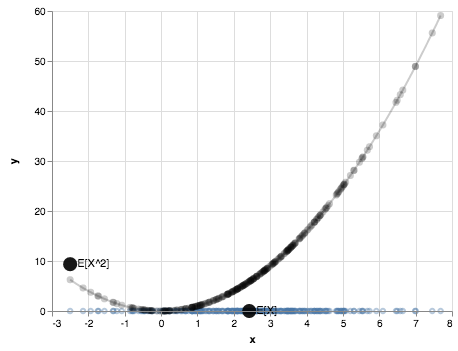

In [231]:
expectedx2 = np.mean([i ** 2 for i in s])


def make_altair_object_labels(X, Y, L):
        bi = []
        for x, y, l in zip(X,Y,L):
            bi.append({"x":x, "y":y, "label": l})
        return alt.Data({"values" : bi})

dt = make_altair_object_labels(X=[min(s)], Y=[expectedx2], L=["E[X^2]"])
                                
c5 = alt.Chart(dt).mark_point(opacity=expectation_opacity, size=expectation_size, color="black", filled=True).encode(
    x='x:Q',  # specify ordinal data
    y='y:Q',  # specify quantitative data
)

dt = make_altair_object_labels(X=[np.mean(s)], Y=[0], L=["E[X]"])
                                
c6 = alt.Chart(dt).mark_point(opacity=expectation_opacity, size=expectation_size, color="black", filled=True).encode(
    x='x:Q',  # specify ordinal data
    y='y:Q',  # specify quantitative data
)

text = c5.mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    text='label:N'
)


text2 = c6.mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    text='label:N'
)

x2 + c2  + c4 + c5 + text + c6 + text2

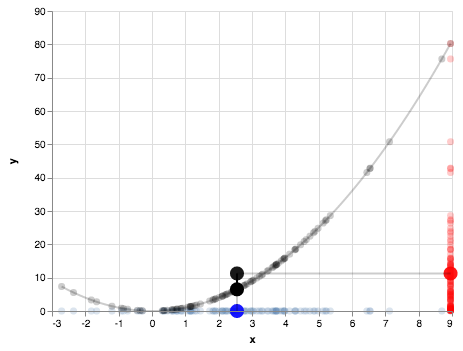

In [122]:
import altair as alt
from vega_datasets import data

import numpy as np

def make_bar_chart(size, opacity, data):
    return alt.Chart(data).mark_bar(size=10, opacity=.2).encode(
        x='x:Q',  # specify ordinal data
        y='y:Q',  # specify quantitative data
    )
    return

def make_plot(s):

    def f(x):
        return x ** 2

    expected_value = f(np.mean(s))
    expected_sq = np.mean([f(i) for i in s])


    def make_altair_object(X, Y):
        bi = []
        for x, y in zip(X,Y):
            bi.append({"x":x, "y":y})
        return alt.Data({"values" : bi})

    point_size = 50
    expectation_size = 200
    point_opacity = .2
    expectation_opacity = .9
    line_opacity=.2

    dt = make_altair_object(s, np.zeros_like(s))

    c1 = alt.Chart(dt).mark_point(size=point_size, filled=True, opacity=point_opacity).encode(
        x='x:Q',  # specify ordinal data
        y='y:Q',  # specify quantitative data
    )

    x = np.linspace(min(s), max(s), 1000)
    y = [f(i) for i in x]
    dt = make_altair_object(x, y)


    c2 = alt.Chart(dt).mark_line(opacity=line_opacity, color="black").encode(
        x='x:Q',  # specify ordinal data
        y='y:Q',  # specify quantitative data
    )

    dt = make_altair_object([np.mean(s)], [0])

    c3 = alt.Chart(dt).mark_point(size=expectation_size, color="blue", opacity=expectation_opacity, filled=True).encode(
        x='x:Q',  # specify ordinal data
        y='y:Q',  # specify quantitative data
    )


    dt = make_altair_object(X=s, Y=[f(i) for i in s])

    c4 = alt.Chart(dt).mark_point(opacity=point_opacity, size=point_size, color="black", filled=True).encode(
        x='x:Q',  # specify ordinal data
        y='y:Q',  # specify quantitative data
    )

    dt = make_altair_object(np.zeros_like(s) + np.max(x), Y=[f(i) for i in s])


    c5 = alt.Chart(dt).mark_point(opacity=point_opacity, size=point_size, color="red", filled=True).encode(
        x='x:Q',  # specify ordinal data
        y='y:Q',  # specify quantitative data
    )

    dt = make_altair_object([np.max(s)], [np.mean([f(i) for i in s])])

    c6 = alt.Chart(dt).mark_point(opacity=expectation_opacity, size=expectation_size, color="red", filled=True).encode(
        x='x:Q',  # specify ordinal data
        y='y:Q',  # specify quantitative data
    )

    dt = make_altair_object([np.mean(s)], [np.mean([f(i) for i in s])])

    c7 = alt.Chart(dt).mark_point(opacity=expectation_opacity, size=expectation_size, color="black", filled=True).encode(
        x='x:Q',  # specify ordinal data
        y='y:Q',  # specify quantitative data
    )

    x = [np.mean(s), np.max(s)]
    y = [np.mean([f(i) for i in s]), np.mean([f(i) for i in s])]

    dt = make_altair_object(x,y)

    c8 = alt.Chart(dt).mark_line(color="black", opacity=line_opacity).encode(
        x='x:Q',  # specify ordinal data
        y='y:Q',  # specify quantitative data
    )

    x = [np.mean(s), np.mean(s)]
    y = [np.mean([f(i) for i in s]), 0]

    dt = make_altair_object(x,y)

    c9 = alt.Chart(dt).mark_line(color="black", opacity=line_opacity).encode(
        x='x:Q',  # specify ordinal data
        y='y:Q',  # specify quantitative data
    )

    x = [np.mean(s), np.mean(s)]
    y = [np.mean([f(i) for i in s]), f(np.mean(s))]

    dt = make_altair_object(x,y)

    c10 = alt.Chart(dt).mark_line(color="black", opacity=1, thickness=100).encode(
        x='x:Q',  # specify ordinal data
        y='y:Q',  # specify quantitative data
    )


    x = [np.mean(s)]
    y = [f(np.mean(s))]

    dt = make_altair_object(x,y)

    c11 = alt.Chart(dt).mark_point(color="black", opacity=1, filled=True, size=expectation_size).encode(
        x='x:Q',  # specify ordinal data
        y='y:Q',  # specify quantitative data
    )
    
    return c1 + c2 + c3 + c4 + c5 + c6 + c7 + c8 + c9 + c10 + c11

make_plot()


### Plowing through the algebra 

This post is devoted to providing a visual intution for the alternate definition of variance. If you are curious about the algebra behind the definition, here is a detailed derivation as well.

Starting from the definition and expanding the square we have

$$Var(X) = \mathbb{E}[(x - \mathbb{E}[X])^2]$$

$$Var(X) = \mathbb{E}[X^2 - 2XE[X] + \mathbb{E}[X]^2]$$

From linearity of expectation we have:

$$Var(X) = \mathbb{E}[X^2]-  \mathbb{E}[2XE[X]] +  \mathbb{E}[\mathbb{E}[X]^2]$$

We can pull out the constants 2 and $\mathbb{E}[X]$ from the expectation in the middle term to get:

$$Var(X) = \mathbb{E}[X^2]-  2\mathbb{E}[X]\mathbb{E}E[X] +  \mathbb{E}[\mathbb{E}[X^2]$$

We can also express the middle term as $2\mathbb{E}[X^2]$ to get

$$Var(X) = \mathbb{E}[X^2]-  2\mathbb{E}[X^2]+  \mathbb{E}[X^2]$$

$$Var(X) = \mathbb{E}[X^2]-  \mathbb{E}[X^2] -  \mathbb{E}[X^2]+  \mathbb{E}[X^2]$$

$$Var(X) = \mathbb{E}[X^2] -   \mathbb{E}[X^2]$$